## Hotel Rating Classification

#####  Whenever we are looking for hotels for vacation or travel, we always prefer a hotel known for its services. The best way to find out whether a hotel is right for you or not is to find out what people are saying about the hotel who have stayed there before. Now it is very difficult to read the experience of each person who has given their opinion on the services of the hotel. This is where the task of sentiment analysis comes in.
##### Well, every industry is now adopting sentiment analysis to assess  its reputation in the online market. The hospitality industry is following the same path with hotel reviews sentiment analysis.

## Problem Statement

##### In this project, our goal is to examine how travelers are communicating their positive and negative experiences in online platforms for staying in a specific hotel. Our major objective is what are the attributes that travelers are considering while selecting a hotel. With this manager can understand which elements of their hotel influence more in forming a positive review or improves hotel brand image.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import string
import nltk
import re

In [2]:
df = pd.read_excel('hotel_reviews.xlsx')

In [3]:
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4.0
1,ok nothing special charge diamond member hilto...,2.0
2,nice rooms not 4* experience hotel monaco seat...,3.0
3,"unique, great stay, wonderful time hotel monac...",5.0
4,"great stay great stay, went seahawk game aweso...",5.0


## Data cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Review  20491 non-null  object 
 1   Rating  20491 non-null  float64
dtypes: float64(1), object(1)
memory usage: 320.3+ KB


In [5]:
df.isnull().sum()

Review    0
Rating    0
dtype: int64

In [6]:
df.duplicated().sum()

0

## Exploratory Data Analysis

In [7]:
df['Rating'].value_counts()

5.0    9054
4.0    6039
3.0    2184
2.0    1793
1.0    1421
Name: Rating, dtype: int64

<AxesSubplot:xlabel='Rating', ylabel='count'>

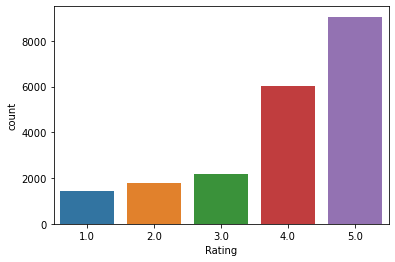

In [8]:
sns.countplot(x='Rating',data = df)

In [9]:
# From above visual, we can say that count of ratings for 4, 5 are comparatively much higher than the other rating scores.
# Hence, we can say for our data that most of the users are highly satisfied with their experience at hotels.

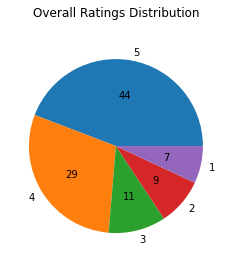

In [10]:
import matplotlib.pyplot as plt
plt.pie(df['Rating'].value_counts(),autopct='%0.0f', labels=['5', '4', '3', '2', '1'])
plt.title('Overall Ratings Distribution\n')
plt.show()

In [11]:
#From above visual, we can say that almost 75% of reviews are rated (5, 4) by users and remaining 25% reviews are rated (3, 2, 1).
#We have an unequal distribution of data, where we have less no. of negative ratings provided by users.
#Hence, our dataset is highly imbalanced dataset.

## Data Preprocessing
#### steps of preprocessing
#### 1)Convert the text data into lower case letter.
#### 2)Then we have to make tokenization for it.
#### 3)Removing the special characters in the data.
#### 4)Removing the stopwords and punctuation.
#### 5)Shorten the txt using stemming and lemmatization

## Lower case:--
##### It is a letter case when all the letters of a string are small. The opposite to lowercase is uppercase when all the letters of a string are capitals. Otherwise, if there are both small and capital letters in a string, it is called a mixed case.

In [12]:
def transform_Review(Review):
    Review = Review.lower()
    return Review

In [13]:
df.head(2)

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4.0
1,ok nothing special charge diamond member hilto...,2.0


## Tokenization
##### Tokenization is the process by which a large quantity of text is divided into smaller parts called tokens.

In [14]:
def transform_Review(Review):
    Review = nltk.word_tokenize()
    return Review

df.head(2)

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4.0
1,ok nothing special charge diamond member hilto...,2.0


## Removing special characters
##### In Python strings, the backslash "" is a special character, also called the "escape" character. It is used in representing certain whitespace characters: "\t" is a tab, "\n" is a newline, and "\r" is a carriage return.

In [15]:
def transform_Review(Review):
    
    y = []
    for i in Review:
        if i.isalnum():
            y.append(i)
        
    return y
df['Review']

0        nice hotel expensive parking got good deal sta...
1        ok nothing special charge diamond member hilto...
2        nice rooms not 4* experience hotel monaco seat...
3        unique, great stay, wonderful time hotel monac...
4        great stay great stay, went seahawk game aweso...
                               ...                        
20486    best kept secret 3rd time staying charm, not 5...
20487    great location price view hotel great quick pl...
20488    ok just looks nice modern outside, desk staff ...
20489    hotel theft ruined vacation hotel opened sept ...
20490    people talking, ca n't believe excellent ratin...
Name: Review, Length: 20491, dtype: object

## Removing stop words and punctuation
##### Stopwords are the English words which does not add much meaning to a sentence. They can safely be ignored without sacrificing the meaning of the sentence. For example, the words like the, he, have etc. Such words are already captured this in corpus named corpus.
##### Punctuation-Special Characters

In [16]:
from nltk.corpus import stopwords
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [17]:
def transform_Review(Review):
    Review = y[:]
    y.clear()
    for i in Review:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    return y
df['Review'][4]

"great stay great stay, went seahawk game awesome, downfall view building did n't complain, room huge staff helpful, booked hotels website seahawk package, no charge parking got voucher taxi, problem taxi driver did n't want accept voucher barely spoke english, funny thing speak arabic called started making comments girlfriend cell phone buddy, took second realize just said fact speak language face priceless, ass told, said large city, told head doorman issue called cab company promply answer did n't, apologized offered pay taxi, bucks 2 miles stadium, game plan taxi return going humpin, great walk did n't mind, right christmas wonderful lights, homeless stowed away building entrances leave, police presence not greatest area stadium, activities 7 blocks pike street waterfront great coffee shops way, hotel mantained foyer awesome, wine tasting available evening, best dog, taking st. bernard time family, safes hotel located service desk room, bathroom huge jetted tub huge, funny house ke

## Stemming
##### Stemming with Python nltk package. "Stemming is the process of reducing inflection in words to their root forms such as mapping a group of words to the same stem even if the stem itself is not a valid word in the Language."

In [18]:
def transform_Review(Review):
    
    for i in Review:
        y.append(ps.stem(i))
    
    return " ".join(y)
df['Review'][4]

"great stay great stay, went seahawk game awesome, downfall view building did n't complain, room huge staff helpful, booked hotels website seahawk package, no charge parking got voucher taxi, problem taxi driver did n't want accept voucher barely spoke english, funny thing speak arabic called started making comments girlfriend cell phone buddy, took second realize just said fact speak language face priceless, ass told, said large city, told head doorman issue called cab company promply answer did n't, apologized offered pay taxi, bucks 2 miles stadium, game plan taxi return going humpin, great walk did n't mind, right christmas wonderful lights, homeless stowed away building entrances leave, police presence not greatest area stadium, activities 7 blocks pike street waterfront great coffee shops way, hotel mantained foyer awesome, wine tasting available evening, best dog, taking st. bernard time family, safes hotel located service desk room, bathroom huge jetted tub huge, funny house ke

## Creating Worldcloud

In [19]:
from textblob import TextBlob
from wordcloud import WordCloud

In [20]:
#Checking the most used words from reviews & plotting it using WordCloud
def wordCloud_generator(data, title=None):
    wordcloud = WordCloud(width = 1000, height = 750, max_words=300,
                          background_color ='white',
                          min_font_size = 10
                         ).generate(" ".join(data.values))
                        
    plt.figure(figsize = (6, 5), facecolor = None) 
    plt.imshow(wordcloud, interpolation='bilinear') 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.title(title,fontsize=25)
    plt.show() 

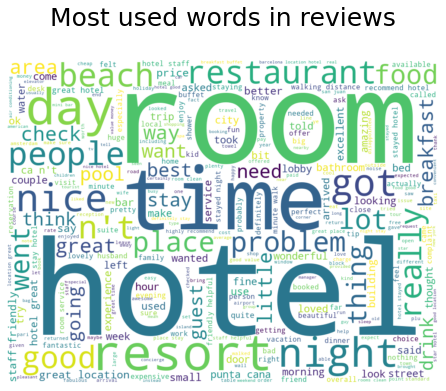

In [21]:
#Plotting the wordcloud on original data for all ratings
wordCloud_generator(data=df['Review'], title="Most used words in reviews\n")

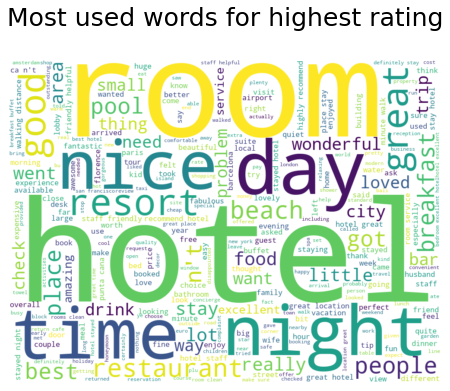

In [22]:
#Plotting the wordcloud on original data for all highest rating (5)
wordCloud_generator(data=df[df['Rating']==5]['Review'], title="Most used words for highest rating\n")

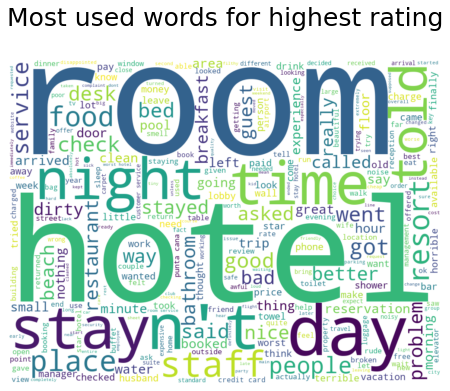

In [23]:
#Plotting the wordcloud on original data for all Lowest rating (==1)
wordCloud_generator(data=df[df['Rating']==1]['Review'], title="Most used words for highest rating\n")

In [32]:
x = df['Review']

In [33]:
x

0        nice hotel expensive parking got good deal sta...
1        ok nothing special charge diamond member hilto...
2        nice rooms not 4* experience hotel monaco seat...
3        unique, great stay, wonderful time hotel monac...
4        great stay great stay, went seahawk game aweso...
                               ...                        
20486    best kept secret 3rd time staying charm, not 5...
20487    great location price view hotel great quick pl...
20488    ok just looks nice modern outside, desk staff ...
20489    hotel theft ruined vacation hotel opened sept ...
20490    people talking, ca n't believe excellent ratin...
Name: Review, Length: 20491, dtype: object

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer(max_features = 3000)
tv_x = tv.fit_transform(x).toarray()

In [35]:
tv_x.shape

(20491, 3000)

#### We will classify all reviews:
#### with Rating== 1 or 2 or 3 as overall - '0'.
#### with Sentiment == 4 or5 as overall - '1'.

In [36]:
classification = df["Rating"].apply(lambda rating : 1 if rating == 4.0 or 5.0 else 0)

In [37]:
y=[]
for i in df["Rating"]:
  if i == 4.0 or i == 5.0 :
    y.append(1)
  else:
    y.append(0)
df["rate"]= y

In [38]:
df.head()

,Review,Rating,rate
0,nice hotel expensive parking got good deal sta...,4.0,1
1,ok nothing special charge diamond member hilto...,2.0,0
2,nice rooms not 4* experience hotel monaco seat...,3.0,0
3,"unique, great stay, wonderful time hotel monac...",5.0,1
4,"great stay great stay, went seahawk game aweso...",5.0,1


In [39]:
y = df["rate"]

In [40]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(tv_x,y,test_size=0.25,random_state=0)

In [41]:
x_train.shape,x_test.shape

((15368, 3000), (5123, 3000))

### Apply Naive Bayes Algorithm

In [42]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()

In [43]:
model.fit(x_train,y_train)

MultinomialNB()

### Accuracy Testing

In [44]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
y_pred = model.predict(x_test)

In [45]:
confusion_matrix(y_test,y_pred)

array([[ 774,  593],
       [ 112, 3644]], dtype=int64)

In [46]:
accuracy_score(y_test,y_pred)

0.8623853211009175

In [47]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.57      0.69      1367
           1       0.86      0.97      0.91      3756

    accuracy                           0.86      5123
   macro avg       0.87      0.77      0.80      5123
weighted avg       0.86      0.86      0.85      5123



<AxesSubplot:>

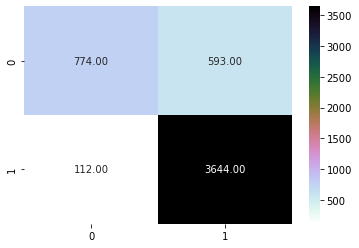

In [49]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot = True, fmt="0.2f",cmap="cubehelix_r")

# Logistic regression

In [50]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(x_train,y_train)

LogisticRegression()

In [51]:
y_pred1 = model1.predict(x_test)

In [52]:
accuracy_score(y_test,y_pred1)

0.8973257856724576

# Random Forest

In [53]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier()
model2.fit(x_train,y_train)

RandomForestClassifier()

In [54]:
y_pred2 = model1.predict(x_test)

In [55]:
accuracy_score(y_test,y_pred2)

0.8973257856724576

# Xgboost 

In [56]:
from xgboost import XGBClassifier
model3 = RandomForestClassifier()
model3.fit(x_train,y_train)

RandomForestClassifier()

In [57]:
y_pred3 = model1.predict(x_test)

In [58]:
accuracy_score(y_test,y_pred3)

0.8973257856724576

# Pipeline

In [59]:
from sklearn.pipeline import Pipeline
pipe = []
pipe.append(('tv',TfidfVectorizer()))
pipe.append(('lr',LogisticRegression()))

In [60]:
pipe

[('tv', TfidfVectorizer()), ('lr', LogisticRegression())]

In [61]:
models =Pipeline(pipe) 

In [62]:
models

Pipeline(steps=[('tv', TfidfVectorizer()), ('lr', LogisticRegression())])

In [63]:
models.fit(x,y)

Pipeline(steps=[('tv', TfidfVectorizer()), ('lr', LogisticRegression())])

# Model Saving

In [64]:
import pickle

In [65]:
f1 = open(file="Hotel_model.pkl",mode="wb")
pickle.dump(models,f1)
f1.close()